In [1]:
!date

Thu Nov 29 11:30:50 UTC 2018


![KSchool](https://kschool.com/wp-content/uploads/2016/08/logo-kschool.png)

# Hi everyone!

I'm Daniel Mateos. I teach at the [masters in Data Science] here at KSchool.

I also teach at the [CUNEF masters program in Data Science] and in the bioinformatics track at [CEU San Pablo]. 

I am a Molecular Biologist and self-taught Data Scientist. You can read all about me at [my website].

[masters in Data Science]: https://kschool.com/cursos/master-en-data-science-madrid/
[CUNEF masters program in Data Science]: https://www.cunef.edu/web/ade-and-master-data-science-finance-marketing-resources
[CEU San Pablo]: https://www.uspceu.com/oferta-academica/grado/grado-en-ingenieria-biomedica
[my website]: http://mateos.io/

## Today

What we are going to do is dive head first into Deep Learning. This talk doesn't assume any knowledge, just the eagerness to jump right into building image classification models!

We will develop a [tool that can tell hotdogs from stuff that is not hotdogs]. That might make us [really rich]!

[tool that can tell hotdogs from stuff that is not hotdogs]: https://www.youtube.com/watch?v=pqTntG1RXSY
[really rich]: https://www.youtube.com/watch?v=NN1ctbKoXTc

## Where we are

[Google Colab] is a hosted notebook environment by Google. You can run GPU-accelerated experiments here for free!

Make sure you have a GPU accelerated runtime by clicking on runtime / change runtime type and choosing a "GPU" hardware accelerator.

[Google Colab]: bhttps://research.google.com/colaboratory/faq.html

# Getting some hotdogs

I've already done the hard, exhausting field work for you. If you are curious about how I did, check it out [in my blog].

Run the following cell. It will download a zip file in the current folder.

[in my blog]: http://mateos.io/blog/

In [2]:
!wget "https://www.dropbox.com/s/dhpekpce05iev6a/data_v2.zip?dl=0" -O data.zip

--2018-11-29 11:30:54--  https://www.dropbox.com/s/dhpekpce05iev6a/data_v2.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.82.1, 2620:100:6032:1::a27d:5201
Connecting to www.dropbox.com (www.dropbox.com)|162.125.82.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/dhpekpce05iev6a/data_v2.zip [following]
--2018-11-29 11:30:54--  https://www.dropbox.com/s/raw/dhpekpce05iev6a/data_v2.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc7668dc8b3d3d0171514f50f4d8.dl.dropboxusercontent.com/cd/0/inline/AWgjxLN6I6rGrL37bqj3bmg4QbKPMR_7Kukrqx3d61YTFioZMRu9HyMEEEPY9R3F8muzB71akoB_u1MpunpIrJnlYMbMO3e8TNLbP_tfLkXuRujDBuEsuTnI-edcdo6RMqmgVWZeCRXRMYhop17yOHh31g5jlsfHfnrvcqH87KxWbYpqDdf17ZFlWLjVLFcyd2k/file [following]
--2018-11-29 11:30:55--  https://uc7668dc8b3d3d0171514f50f4d8.dl.dropboxusercontent.com/cd/0/inline/AWgjxLN6I6rGrL37bqj3bmg4QbKPMR_7Kukrqx3d61YTFi

In [3]:
!ls -lh

total 960M
drwxrwxr-x 5 root root 4.0K Jun 27 13:23 data
-rw-r--r-- 1 root root 711M Nov 29 11:31 data.zip
-rw-r--r-- 1 root root  38M Nov 29 09:20 my_2nd_cnn_1.h5
-rw-r--r-- 1 root root  38M Nov 29 09:31 my_2nd_cnn_2.h5
-rw-r--r-- 1 root root  38M Nov 29 09:41 my_2nd_cnn_3.h5
-rw-r--r-- 1 root root  19M Nov 29 08:47 my_first_cnn_1.h5
-rw-r--r-- 1 root root  19M Nov 29 08:50 my_first_cnn_2.h5
-rw-r--r-- 1 root root  19M Nov 29 08:52 my_first_cnn_3.h5
-rw-r--r-- 1 root root  19M Nov 29 08:56 my_first_cnn_4.h5
drwxr-xr-x 2 root root 4.0K Nov 20 18:17 sample_data
-rw-r--r-- 1 root root  64M Nov 29 11:19 vgg_1.h5


Now, unzip the zip file. It contains a 'data' folder that contains three folders in turn: train, test and validation. Inside each of those there are two folders: "hotdog" and "nohotdog".

In [4]:
!rm -rf data/
!unzip -oq data.zip
!ls -lh data

total 12K
drwxrwxr-x 4 root root 4.0K Jun 27 13:23 test
drwxrwxr-x 4 root root 4.0K Jun 27 10:27 train
drwxrwxr-x 4 root root 4.0K Jun 27 13:23 validation


# The Classifier

![Keras](https://cdn-images-1.medium.com/max/1600/1*wwnExqe720PPHykHhs5Hqw.png)

Let's build our first Convolutional Neural Network! We will be using [Keras].

[Keras]: https://keras.io

In [5]:
import keras
from keras import backend as K

Using TensorFlow backend.


In [6]:
from keras.layers import Conv2D, MaxPooling2D, InputLayer, Flatten, Dense

my_first_cnn = keras.Sequential()
my_first_cnn.add(Conv2D(32, (3, 3), activation='relu', input_shape=(120, 120, 3)))
my_first_cnn.add(MaxPooling2D((2,2)))
my_first_cnn.add(Conv2D(32, (3, 3), activation='relu'))
my_first_cnn.add(MaxPooling2D((2,2)))
my_first_cnn.add(Flatten())
my_first_cnn.add(Dense(64, activation='relu'))
my_first_cnn.add(Dense(1, activation='sigmoid'))

my_first_cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 118, 118, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 59, 59, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 57, 57, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                1605696   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total para

## Feeding it

We will need to feed the classifier in batches so it can learn. We will use Keras's [ImageDataGenerator].

[ImageDataGenerator]: https://keras.io/preprocessing/image/

In [7]:
%%time
from keras.preprocessing.image import ImageDataGenerator
import os

base_dir = 'data/'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_datagen = ImageDataGenerator(rescale=1 / 255)
test_datagen = ImageDataGenerator(rescale=1 / 255)

train_generator = train_datagen.flow_from_directory(train_dir, 
                                                    target_size=(120,120),
                                                    batch_size=100,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(120,120),
                                                        batch_size=100,
                                                        class_mode='binary')


Found 4765 images belonging to 2 classes.
Found 888 images belonging to 2 classes.
CPU times: user 226 ms, sys: 41.4 ms, total: 268 ms
Wall time: 313 ms


## Waste no time in learning

At this point, we are ready to do some learning! Let's just go ahead.


In [8]:
%%time
from keras.optimizers import Adam

my_first_cnn.compile(loss='binary_crossentropy',
                     optimizer=Adam(lr=1e-3),
                     metrics=['acc'])

history_pt1 = my_first_cnn.fit_generator(train_generator,
                                         steps_per_epoch=20,
                                         epochs=10,
                                         validation_data=validation_generator,
                                         validation_steps=10)

my_first_cnn.save('my_first_cnn_1.h5')

Epoch 1/10
20/20 [==============================] - 16s 824ms/step - loss: 0.4327 - acc: 0.8805 - val_loss: 0.3526 - val_acc: 0.8775
Epoch 2/10
20/20 [==============================] - 14s 714ms/step - loss: 0.3183 - acc: 0.8735 - val_loss: 0.3260 - val_acc: 0.8715
Epoch 3/10
20/20 [==============================] - 15s 736ms/step - loss: 0.2948 - acc: 0.8733 - val_loss: 0.2636 - val_acc: 0.8704
Epoch 4/10
20/20 [==============================] - 14s 698ms/step - loss: 0.2564 - acc: 0.8745 - val_loss: 0.2416 - val_acc: 0.8654
Epoch 5/10
20/20 [==============================] - 15s 731ms/step - loss: 0.2320 - acc: 0.8734 - val_loss: 0.2384 - val_acc: 0.8775
Epoch 6/10
20/20 [==============================] - 14s 725ms/step - loss: 0.2414 - acc: 0.8820 - val_loss: 0.2929 - val_acc: 0.8644
Epoch 7/10
20/20 [==============================] - 14s 712ms/step - loss: 0.2345 - acc: 0.8710 - val_loss: 0.2291 - val_acc: 0.8704
Epoch 8/10
20/20 [==============================] - 14s 694ms/step - 

## What is actually happening here?

Our classifier is a [convolutional neural network]. These have revolutionized a number of applications, mostly since their huge success in the 2012 ImageNet competition.

[convolutional neural network]: https://en.wikipedia.org/wiki/Convolutional_neural_network

![2012 ImageNet competition](https://blogs.nvidia.com/wp-content/uploads/2016/06/DefenseAIPicture3-002.png)

## Convolutional Neural Networks

They are based on convolution. Basically, we apply filters to subsections of the image and calculate how much each subsection fits with the feature described by the filter.

![Convolution](https://cdn-images-1.medium.com/max/1600/1*_34EtrgYk6cQxlJ2br51HQ.gif)

We do that several time, aggregating aggregations, learning more and more sofisticated features.

![Convolutional Neural Networks](https://www.jeremyjordan.me/content/images/2018/04/vgg16.png)

# Measuring the right things

Keras has assigned the label 0 to our hotdog class, which we consider positive, and 1 to our nothotdog class, which we consider negative. Therefore, in our binary classification setting we will have true positives top left, true negatives bottom right, false positives bottom left, and false negatives top right.

$$ precision = \frac{true\ positives}{predicted\ positives} = \frac{C_{0,0}}{C_{0,0} + C_{1,0}} $$

and recall will be:

$$ recall = \frac{true\ positives}{total\ positives} = \frac{C_{0,0}}{C_{0,0} + C_{0,1}}$$


Found 888 images belonging to 2 classes.
0.7924528301886793 0.3684210526315789


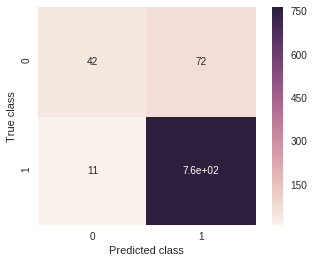

In [9]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
%matplotlib inline


validation_generator_noshuffle = test_datagen.flow_from_directory(validation_dir,
                                                                  target_size=(120,120),
                                                                  batch_size=100,
                                                                  shuffle=False,
                                                                  class_mode='binary')

predictions = my_first_cnn.predict_generator(validation_generator_noshuffle, steps=9)
C = confusion_matrix(validation_generator_noshuffle.classes, predictions > .5)
ax = sns.heatmap(C, annot=True, square=True)
ax.set_ylabel('True class')
ax.set_xlabel('Predicted class')

precision = C[0,0] / (C[0,0] + C[1,0])
recall = C[0][0] / (C[0,0] + C[0,1])

print(precision, recall)

## Unbalanced

We have many more nothodogs than not hodogs. That will affect how good we consider our classifier.

In [10]:
%%time
from keras.optimizers import Adam


my_first_cnn.compile(loss='binary_crossentropy',
                     optimizer=Adam(lr=1e-3),
                     metrics=['acc'])

history_pt2 = my_first_cnn.fit_generator(train_generator,
                                         class_weight = {0: 7, 1: 1},
                                         steps_per_epoch=20,
                                         epochs=10,
                                         validation_data=validation_generator,
                                         validation_steps=10)

my_first_cnn.save('my_first_cnn_2.h5')

Epoch 1/10
20/20 [==============================] - 15s 772ms/step - loss: 0.8553 - acc: 0.8970 - val_loss: 0.2816 - val_acc: 0.8968
Epoch 2/10
20/20 [==============================] - 14s 711ms/step - loss: 0.6889 - acc: 0.8673 - val_loss: 0.4786 - val_acc: 0.7743
Epoch 3/10
20/20 [==============================] - 15s 729ms/step - loss: 0.4547 - acc: 0.8725 - val_loss: 0.2944 - val_acc: 0.8836
Epoch 4/10
20/20 [==============================] - 14s 696ms/step - loss: 0.5477 - acc: 0.8485 - val_loss: 0.3089 - val_acc: 0.8401
Epoch 5/10
20/20 [==============================] - 14s 711ms/step - loss: 0.3719 - acc: 0.8939 - val_loss: 0.3262 - val_acc: 0.8603
Epoch 6/10
20/20 [==============================] - 14s 707ms/step - loss: 0.3829 - acc: 0.8870 - val_loss: 0.3392 - val_acc: 0.8443
Epoch 7/10
20/20 [==============================] - 14s 708ms/step - loss: 0.3895 - acc: 0.8854 - val_loss: 0.2975 - val_acc: 0.8775
Epoch 8/10
20/20 [==============================] - 14s 712ms/step - 

## The magic of Deep Learning

![Hierarchy of features](https://cdn-images-1.medium.com/max/756/1*jl3je_hGCESg-G8dy3Z9Yg.png)

0.48292682926829267 0.868421052631579


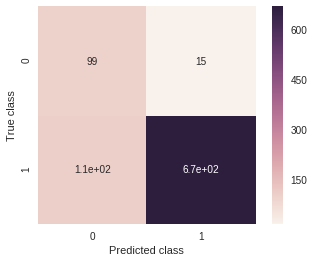

In [11]:
validation_generator_noshuffle.reset()
predictions = my_first_cnn.predict_generator(validation_generator_noshuffle, steps=9)
C = confusion_matrix(validation_generator_noshuffle.classes, predictions > .5)
ax = sns.heatmap(C, annot=True, square=True)
ax.set_ylabel('True class')
ax.set_xlabel('Predicted class')

precision = C[0,0] / (C[0,0] + C[1,0])
recall = C[0][0] / (C[0,0] + C[0,1])

print(precision, recall)

# Too much of a good thing

The more our classifier looks at the training data, the more it will learn about it. It might even learn too much!

In [12]:
%%time
from keras.optimizers import Adam

my_first_cnn.compile(loss='binary_crossentropy',
                     optimizer=Adam(lr=1e-3),
                     metrics=['acc'])

history_pt3 = my_first_cnn.fit_generator(train_generator,
                                         class_weight = {0: 7, 1: 1},
                                         steps_per_epoch=20,
                                         epochs=10,
                                         validation_data=validation_generator,
                                         validation_steps=10,
                                         verbose=1)

my_first_cnn.save('my_first_cnn_3.h5')

Epoch 1/10
20/20 [==============================] - 16s 782ms/step - loss: 0.3769 - acc: 0.8990 - val_loss: 0.2708 - val_acc: 0.8998
Epoch 2/10
20/20 [==============================] - 14s 684ms/step - loss: 0.2860 - acc: 0.9216 - val_loss: 0.3376 - val_acc: 0.8796
Epoch 3/10
20/20 [==============================] - 14s 720ms/step - loss: 0.2891 - acc: 0.9245 - val_loss: 0.2647 - val_acc: 0.9006
Epoch 4/10
20/20 [==============================] - 14s 706ms/step - loss: 0.2824 - acc: 0.9204 - val_loss: 0.2828 - val_acc: 0.9038
Epoch 5/10
20/20 [==============================] - 14s 688ms/step - loss: 0.2064 - acc: 0.9450 - val_loss: 0.2618 - val_acc: 0.9130
Epoch 6/10
20/20 [==============================] - 15s 734ms/step - loss: 0.2138 - acc: 0.9365 - val_loss: 0.2795 - val_acc: 0.9069
Epoch 7/10
20/20 [==============================] - 15s 734ms/step - loss: 0.1857 - acc: 0.9467 - val_loss: 0.2982 - val_acc: 0.9170
Epoch 8/10
20/20 [==============================] - 14s 715ms/step - 

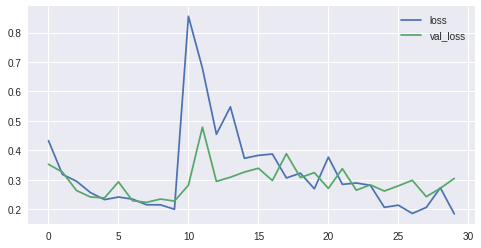

In [13]:
import matplotlib.pyplot as plt

f, axes = plt.subplots(1,1)

f.set_size_inches(8,4)

loss = [step for part in [history_pt1, history_pt2, history_pt3] for step in  part.history['loss']]
val_loss = [step for part in [history_pt1, history_pt2, history_pt3] for step in  part.history['val_loss']]


axes.plot(range(len(loss)), loss, label='loss')
axes.plot(range(len(loss)), val_loss, label='val_loss')
axes.legend()

0.543859649122807 0.8157894736842105


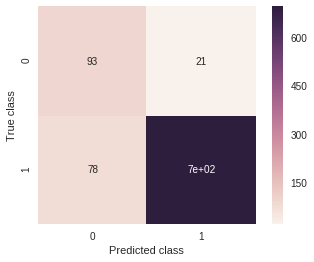

In [14]:
validation_generator_noshuffle.reset()
predictions = my_first_cnn.predict_generator(validation_generator_noshuffle, steps=9)

C = confusion_matrix(validation_generator_noshuffle.classes, predictions > .5)
ax = sns.heatmap(C, annot=True, square=True)
ax.set_ylabel('True class')
ax.set_xlabel('Predicted class')

precision = C[0,0] / (C[0,0] + C[1,0])
recall = C[0][0] / (C[0,0] + C[0,1])

print(precision, recall)

# Making stuff up

Our classifier is learning features that are too specific of the training data, which makes it not generalize too well. 

Since we want to make it recognize more varied images, we could feed it more varied images. But we already have as many as we could gather!

Surprisingly, there is a way to get more from the data we have: making stuff up! In order to look more serious, we will call it [data augmentation].

[data augmentation]: https://medium.com/nanonets/how-to-use-deep-learning-when-you-have-limited-data-part-2-data-augmentation-c26971dc8ced

In [15]:
train_datagen_augmented = ImageDataGenerator(rescale=1 / 255,
                                             rotation_range=40,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True,
                                             fill_mode='nearest')

train_generator_aug = train_datagen_augmented.flow_from_directory(train_dir, 
                                                                  target_size=(120,120),
                                                                  batch_size=100,
                                                                  class_mode='binary')


Found 4765 images belonging to 2 classes.


In [0]:
images, classes = train_generator_aug.next()

In [17]:
images.shape

(100, 120, 120, 3)

0.0


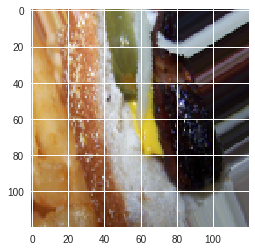

In [18]:
import random

n = random.randint(0, 99)  
plt.imshow(images[n])
print(classes[n])

In [19]:
%%time
train_generator_aug.reset()

my_first_cnn.compile(loss='binary_crossentropy',
                     optimizer=Adam(lr=1e-3),
                     metrics=['acc'])

history_pt4 = my_first_cnn.fit_generator(train_generator_aug,
                                         class_weight = {0: 7, 1: 1},
                                         steps_per_epoch=20,
                                         epochs=10,
                                         validation_data=validation_generator,
                                         validation_steps=10,
                                         verbose=1)

my_first_cnn.save('my_first_cnn_4.h5')

Epoch 1/10
20/20 [==============================] - 22s 1s/step - loss: 0.8400 - acc: 0.7560 - val_loss: 0.4176 - val_acc: 0.7682
Epoch 2/10
20/20 [==============================] - 21s 1s/step - loss: 0.6872 - acc: 0.8170 - val_loss: 0.4743 - val_acc: 0.7601
Epoch 3/10
20/20 [==============================] - 20s 1s/step - loss: 0.7260 - acc: 0.7953 - val_loss: 0.3389 - val_acc: 0.8381
Epoch 4/10
20/20 [==============================] - 21s 1s/step - loss: 0.7043 - acc: 0.8115 - val_loss: 0.2395 - val_acc: 0.9059
Epoch 5/10
20/20 [==============================] - 21s 1s/step - loss: 0.6459 - acc: 0.8248 - val_loss: 0.2603 - val_acc: 0.8806
Epoch 6/10
20/20 [==============================] - 21s 1s/step - loss: 0.6543 - acc: 0.8090 - val_loss: 0.2357 - val_acc: 0.9018
Epoch 7/10
20/20 [==============================] - 21s 1s/step - loss: 0.6263 - acc: 0.8310 - val_loss: 0.3738 - val_acc: 0.8269
Epoch 8/10
20/20 [==============================] - 21s 1s/step - loss: 0.6982 - acc: 0.84

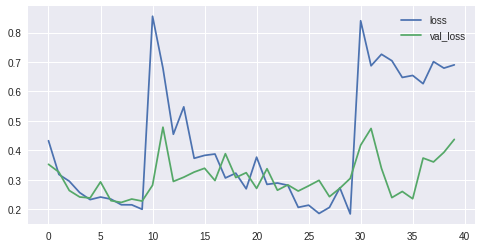

In [20]:
import matplotlib.pyplot as plt

f, axes = plt.subplots(1,1)

f.set_size_inches(8,4)

loss = [step for part in [history_pt1, history_pt2, history_pt3, history_pt4] for step in  part.history['loss']]
val_loss = [step for part in [history_pt1, history_pt2, history_pt3, history_pt4] for step in  part.history['val_loss']]


axes.plot(range(len(loss)), loss, label='loss')
axes.plot(range(len(loss)), val_loss, label='val_loss')
axes.legend()

0.3939393939393939 0.9122807017543859


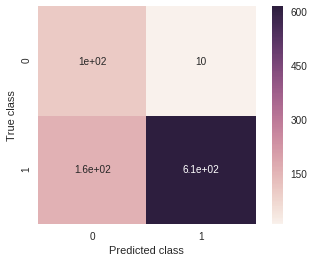

In [28]:
validation_generator_noshuffle.reset()
predictions = my_first_cnn.predict_generator(validation_generator_noshuffle, steps=9)

C = confusion_matrix(validation_generator_noshuffle.classes, predictions > .5)
ax = sns.heatmap(C, annot=True, square=True)
ax.set_ylabel('True class')
ax.set_xlabel('Predicted class')

precision = C[0,0] / (C[0,0] + C[1,0])
recall = C[0][0] / (C[0,0] + C[0,1])

print(precision, recall)

# On the shoulders of giants

Our first, very simple classifier is now about as good as it can get. Since we haven't been able to overfit, we could try to make it more complex, so that it can learn more nuanced features.

We could, definitely, try and compare many different architectures. But why do that if there are world-class experts who have [done it already]?

[done it already]: https://medium.com/coinmonks/paper-review-of-vggnet-1st-runner-up-of-ilsvlc-2014-image-classification-d02355543a11

In [22]:
from keras.applications import VGG16

vgg = VGG16(weights='imagenet', 
            include_top=False, 
            input_shape=(120,120,3))

model = keras.Sequential()
vgg.trainable = False
model.add(vgg)
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 3, 3, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 65        
Total params: 15,329,473
Trainable params: 614,785
Non-trainable params: 14,714,688
__________________________________________________________

In [23]:
model.layers[0].summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 120, 120, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 120, 120, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 120, 120, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 60, 60, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 60, 60, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 60, 60, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 30, 30, 128)       0         
__________

In [24]:
%%time

model.compile(loss='binary_crossentropy',
                     optimizer=Adam(lr=1e-3),
                     metrics=['acc'])

vgg_history = model.fit_generator(train_generator,
                                  class_weight = {0: 7, 1: 1},
                                  steps_per_epoch=20,
                                  epochs=7,
                                  validation_data=validation_generator,
                                  validation_steps=10)

model.save('vgg_1.h5')

Epoch 1/7
20/20 [==============================] - 22s 1s/step - loss: 0.8052 - acc: 0.8065 - val_loss: 0.3033 - val_acc: 0.8654
Epoch 2/7
20/20 [==============================] - 14s 713ms/step - loss: 0.4892 - acc: 0.8889 - val_loss: 0.3664 - val_acc: 0.8512
Epoch 3/7
20/20 [==============================] - 15s 774ms/step - loss: 0.5035 - acc: 0.8715 - val_loss: 0.3062 - val_acc: 0.8765
Epoch 4/7
20/20 [==============================] - 16s 794ms/step - loss: 0.4139 - acc: 0.8991 - val_loss: 0.2746 - val_acc: 0.8826
Epoch 5/7
20/20 [==============================] - 16s 787ms/step - loss: 0.2862 - acc: 0.9290 - val_loss: 0.2220 - val_acc: 0.9190
Epoch 6/7
20/20 [==============================] - 15s 763ms/step - loss: 0.3218 - acc: 0.9282 - val_loss: 0.2048 - val_acc: 0.9201
Epoch 7/7
20/20 [==============================] - 15s 767ms/step - loss: 0.2164 - acc: 0.9445 - val_loss: 0.1744 - val_acc: 0.9291
CPU times: user 3min 1s, sys: 8.12 s, total: 3min 9s
Wall time: 1min 55s


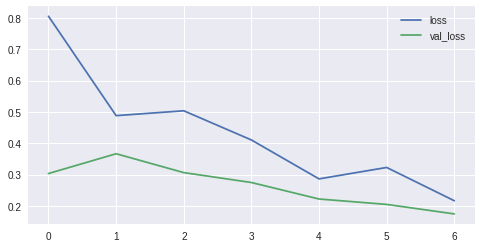

In [25]:
f, axes = plt.subplots(1,1)

f.set_size_inches(8,4)

loss = vgg_history.history['loss']
val_loss = vgg_history.history['val_loss']


axes.plot(range(len(loss)), loss, label='loss')
axes.plot(range(len(loss)), val_loss, label='val_loss')
axes.legend()

0.7407407407407407 0.7017543859649122


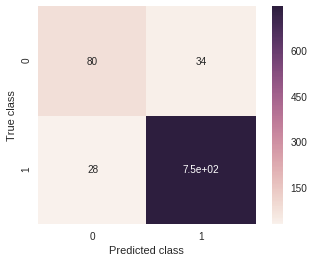

In [26]:
validation_generator_noshuffle.reset()
predictions = model.predict_generator(validation_generator_noshuffle, steps=9)

C = confusion_matrix(validation_generator_noshuffle.classes, predictions > .5)
ax = sns.heatmap(C, annot=True, square=True)
ax.set_ylabel('True class')
ax.set_xlabel('Predicted class')

precision = C[0,0] / (C[0,0] + C[1,0])
recall = C[0][0] / (C[0,0] + C[0,1])

print(precision, recall)

In [27]:
!date 

Thu Nov 29 11:44:57 UTC 2018


# The way from here

This talk has been based on a [series of posts] I'm currently publishing in [my blog]. You can check them out if you are curious about how I got the data, you want to learn more about what I talked about today, or you want to learn more techniques that we could apply to our classifier to make it even better.

If you think this is your thing, you can learn a lot more in the [KSchool masters program in Deep Learning and Artificial Intelligence]! 

Or, if you think you have a project that we could do together, I'm available. Just contact me through my [email] or [linkedin]

[series of posts]: http://mateos.io/blog/getting-some-hotdogs/
[my blog]: http://mateos.io/blog/
[KSchool masters program in Deep Learning and Artificial Intelligence]: https://kschool.com/cursos/master-deep-learning-inteligencia-artificial-madrid/
[email]: daniel@mateos.io
[linkedin]: https://es.linkedin.com/in/daniel-mateos-san-mart%C3%ADn-b02aa956